# Secondary Axis

Sometimes we want a secondary axis on a plot, for instance to convert radians to degrees on the same plot. We can do this by making a child axes with only one axis visible via axes.Axes.secondary_xaxis and axes.Axes.secondary_yaxis. This secondary axis can have a different scale than the main axis by providing both a forward and an inverse conversion function in a tuple to the functions kwarg:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

%matplotlib inline

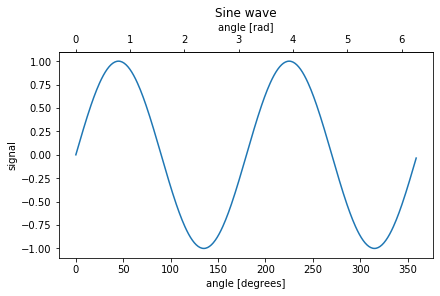

In [2]:
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

Here is the case of converting from wavenumber to wavelength in a log-log scale.

Note: in this case, the xscale of the parent is logarithmic, so the child is made logarithmic as well.

/Users/ulrichmabou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


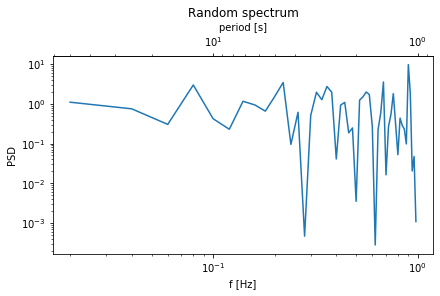

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0.02, 1, 0.02)
np.random.seed(19680801)
y = np.random.randn(len(x)) ** 2
ax.loglog(x, y)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')


def forward(x):
    return 1 / x


def inverse(x):
    return 1 / x


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('period [s]')
plt.show()

Sometime we want to relate the axes in a transform that is ad-hoc from the data, and is derived empirically. In that case we can set the forward and inverse transforms functions to be linear interpolations from the one data set to the other.

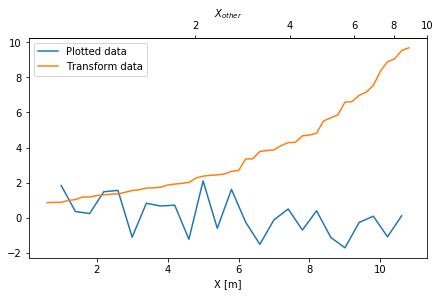

In [5]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))
ax.plot(xdata, ydata, label='Plotted data')

xold = np.arange(0, 11, 0.2)
# fake data set relating x co-ordinate to another data-derived co-ordinate.
# xnew must be monotonic, so we sort...
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)

ax.plot(xold[3:], xnew[3:], label='Transform data')
ax.set_xlabel('X [m]')
ax.legend()


def forward(x):
    return np.interp(x, xold, xnew)


def inverse(x):
    return np.interp(x, xnew, xold)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('$X_{other}$')

plt.show()

A final example translates np.datetime64 to yearday on the x axis and from Celsius to Farenheit on the y axis:

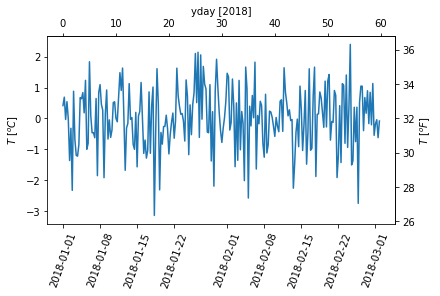

In [6]:
dates = [datetime.datetime(2018, 1, 1) + datetime.timedelta(hours=k * 6)
         for k in range(240)]
temperature = np.random.randn(len(dates))
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(dates, temperature)
ax.set_ylabel(r'$T\ [^oC]$')
plt.xticks(rotation=70)


def date2yday(x):
    """Convert matplotlib datenum to days since 2018-01-01."""
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


def yday2date(x):
    """Return a matplotlib datenum for *x* days after 2018-01-01."""
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


secaxx = ax.secondary_xaxis('top', functions=(date2yday, yday2date))
secaxx.set_xlabel('yday [2018]')


def CtoF(x):
    return x * 1.8 + 32


def FtoC(x):
    return (x - 32) / 1.8


secaxy = ax.secondary_yaxis('right', functions=(CtoF, FtoC))
secaxy.set_ylabel(r'$T\ [^oF]$')

plt.show()